## Importing Libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_excel(r'/home/aditya/Desktop/companies assesement/datascienceroleatcars24/data.xlsx', sheet_name='data')
variable_df = pd.read_excel(r'/home/aditya/Desktop/companies assesement/datascienceroleatcars24/data.xlsx')

In [5]:
pwd

'/home/aditya/Desktop/companies assesement/datascienceroleatcars24'

In [6]:
ls

'air-quality-index-analysis-ml-visualisation (copy).ipynb'
 air-quality-index-analysis-ml-visualisation.ipynb
'CARS24 1.ipynb'
'Case Study_2_Flights.docx'
 data.xlsx
'DS Assignment.docx'
 indian-air-quality-analysis-prediction-using-ml.ipynb
 table1.txt
 table2.txt


In [7]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


In [8]:
variable_df.head(20)

,Columns,Description,Variable
0,appointmentId,Unique id,Independent
1,inspectionStartTime,inspection date,Independent
2,year,registration year,Independent
3,month,registration month,Independent
4,engineTransmission_battery_value,condition ok: yes\nelse : no,Independent
5,engineTransmission_battery_cc_value_0,current condition if not yes,Independent
6,engineTransmission_battery_cc_value_1,current condition if not yes,Independent
7,engineTransmission_battery_cc_value_2,current condition if not yes,Independent
8,engineTransmission_battery_cc_value_3,current condition if not yes,Independent
9,engineTransmission_battery_cc_value_4,current condition if not yes,Independent



## Now, we can immediatly see that there are quite a few nulls in various columns, 
## which need work and first need a closer inspection

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=True)

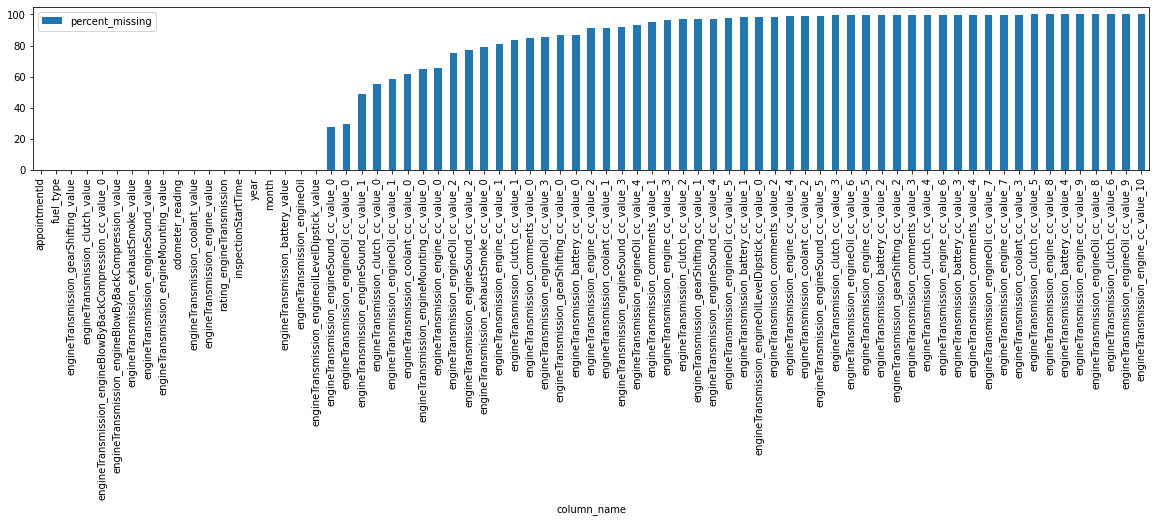

In [14]:
missing_value_df.head(50)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
missing_value_df.plot(x='column_name', y='percent_missing', kind='bar') 
plt.show()

Selecting columns with <20% missing data

In [17]:
valid_df=missing_value_df[missing_value_df['percent_missing']<20]
valid_columns=valid_df['column_name']
valid_columns=list(valid_columns)
print(valid_columns)

['appointmentId', 'fuel_type', 'engineTransmission_gearShifting_value', 'engineTransmission_clutch_value', 'engineTransmission_engineBlowByBackCompression_cc_value_0', 'engineTransmission_engineBlowByBackCompression_value', 'engineTransmission_exhaustSmoke_value', 'engineTransmission_engineSound_value', 'engineTransmission_engineMounting_value', 'odometer_reading', 'engineTransmission_coolant_value', 'engineTransmission_engine_value', 'rating_engineTransmission', 'inspectionStartTime', 'year', 'month', 'engineTransmission_battery_value', 'engineTransmission_engineOil', 'engineTransmission_engineoilLevelDipstick_value']


In [24]:
df_1= df[valid_columns]
df_1.shape

(26307, 19)

In [25]:
df_1.head()

,appointmentId,fuel_type,engineTransmission_gearShifting_value,engineTransmission_clutch_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_exhaustSmoke_value,engineTransmission_engineSound_value,engineTransmission_engineMounting_value,odometer_reading,engineTransmission_coolant_value,engineTransmission_engine_value,rating_engineTransmission,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineOil,engineTransmission_engineoilLevelDipstick_value
0,aj_01,Petrol + CNG,Yes,No,Back Compression Exist,No,No,No,No,124600,No,No,3.0,2019-02-03 15:43:48,2008,8,No,No,Yes
1,aj_02,Petrol + CNG,Yes,Yes,NO Blow-by,Yes,No,No,Yes,78108,No,No,4.0,2019-01-16 13:02:12,2007,5,Yes,No,Yes
2,aj_03,Diesel,Yes,No,Perm. Blow By on idle,Yes,No,No,No,93348,No,Yes,3.5,2019-02-09 13:31:04,2012,5,Yes,No,Yes
3,aj_04,Petrol + CNG,Yes,No,NO Blow-by,Yes,Yes,Yes,Yes,48233,No,Yes,3.5,2019-01-18 11:02:53,2013,1,Yes,No,Yes
4,aj_05,Petrol + CNG,Yes,No,NO Blow-by,Yes,No,No,No,74368,Yes,No,4.0,2019-01-27 12:12:06,2011,7,Yes,No,Yes


In [26]:
df_1.describe()

,odometer_reading,rating_engineTransmission,year,month
count,26307.000000,26307.000000,26307.000000,26307.000000
mean,76460.143764,3.624663,2010.856578,5.462006
std,46762.524489,0.847645,3.766234,3.583866
min,1.000000,0.500000,1989.000000,1.000000
25%,46396.000000,3.500000,2008.000000,2.000000
50%,72013.000000,4.000000,2011.000000,5.000000
75%,98289.500000,4.000000,2014.000000,9.000000
max,999999.000000,5.000000,2019.000000,12.000000


In [27]:
df_1['inspection_year']=df_1['inspectionStartTime'].apply(lambda x:x.year)
df_1['used_time']=df_1['inspection_year']-df_1['year']

<ipython-input-27-8b19d1e51b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['inspection_year']=df_1['inspectionStartTime'].apply(lambda x:x.year)
<ipython-input-27-8b19d1e51b4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['used_time']=df_1['inspection_year']-df_1['year']


In [69]:
X=df_1[[ 'fuel_type', 'engineTransmission_gearShifting_value',
       'engineTransmission_clutch_value', 'engineTransmission_engineBlowByBackCompression_cc_value_0',
       'engineTransmission_engineBlowByBackCompression_value',
       'engineTransmission_exhaustSmoke_value', 'engineTransmission_engineSound_value', 
       'engineTransmission_engineMounting_value', 'odometer_reading',
       'engineTransmission_coolant_value', 'engineTransmission_engine_value',
       'used_time', 
       'engineTransmission_battery_value', 'engineTransmission_engineOil', 
       'engineTransmission_engineoilLevelDipstick_value']]
y=df_1[[ 'rating_engineTransmission']]

In [70]:
cols = X.columns
num_cols = X._get_numeric_data().columns
categorical_variable= list(set(cols) - set(num_cols))


Converting categorical variable into one-hot encoding

In [71]:
categorical_variable

['engineTransmission_clutch_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineMounting_value',
 'engineTransmission_gearShifting_value',
 'engineTransmission_engineSound_value',
 'fuel_type',
 'engineTransmission_engineOil',
 'engineTransmission_battery_value',
 'engineTransmission_engineBlowByBackCompression_cc_value_0',
 'engineTransmission_engineBlowByBackCompression_value',
 'engineTransmission_engine_value',
 'engineTransmission_exhaustSmoke_value',
 'engineTransmission_coolant_value']

In [72]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 
features_to_encode = ['engineTransmission_engineOil',
 'engineTransmission_exhaustSmoke_value',
 'engineTransmission_engineMounting_value',
 'engineTransmission_battery_value',
 'fuel_type',
 'engineTransmission_engineBlowByBackCompression_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_coolant_value',
 'engineTransmission_engine_value',
 'engineTransmission_gearShifting_value',
 'engineTransmission_engineBlowByBackCompression_cc_value_0',
 'engineTransmission_clutch_value',
 'engineTransmission_engineSound_value']
for feature in features_to_encode:
    res = encode_and_bind(X, feature)
    X=res

In [73]:
X.head()

,odometer_reading,used_time,engineTransmission_engineOil_No,engineTransmission_engineOil_Yes,engineTransmission_exhaustSmoke_value_No,engineTransmission_exhaustSmoke_value_Yes,engineTransmission_engineMounting_value_No,engineTransmission_engineMounting_value_Yes,engineTransmission_battery_value_No,engineTransmission_battery_value_Yes,...,engineTransmission_gearShifting_value_Yes,engineTransmission_engineBlowByBackCompression_cc_value_0_Back Compression Exist,engineTransmission_engineBlowByBackCompression_cc_value_0_NO Blow-by,engineTransmission_engineBlowByBackCompression_cc_value_0_Oil spillage on Idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. Blow By on idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. blow by & oil spillage on idle,engineTransmission_clutch_value_No,engineTransmission_clutch_value_Yes,engineTransmission_engineSound_value_No,engineTransmission_engineSound_value_Yes
0,124600,11,1,0,1,0,1,0,1,0,...,1,1,0,0,0,0,1,0,1,0
1,78108,12,1,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
2,93348,7,1,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,0,1,0
3,48233,6,1,0,0,1,0,1,0,1,...,1,0,1,0,0,0,1,0,0,1
4,74368,8,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0


In [74]:
y['rating_engineTransmission']=y['rating_engineTransmission'].apply(lambda x: 2*x)
y=y.astype(int)

<ipython-input-74-a0c08ab9ab5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['rating_engineTransmission']=y['rating_engineTransmission'].apply(lambda x: 2*x)


In [77]:
unique, counts = np.unique(int_array, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    1     1]
 [    2  1456]
 [    3     6]
 [    4   117]
 [    5   420]
 [    6  4379]
 [    7  5944]
 [    8 10152]
 [    9  2209]
 [   10  1623]]


# Splitting the data

In [35]:
from sklearn.model_selection import train_test_split


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Creating & Training Linear Regression Model

In [37]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)


LinearRegression()

In [39]:
lm.score(X_test,y_test)


0.3905332557890294

## Creating & Training KNN Model


In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train.values.ravel())


KNeighborsClassifier(n_neighbors=10)

In [41]:
knn.score(X_test,y_test)


0.32630178639300644

## Elbow Method For optimum value of K

In [42]:
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    error_rate.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Error Rate')

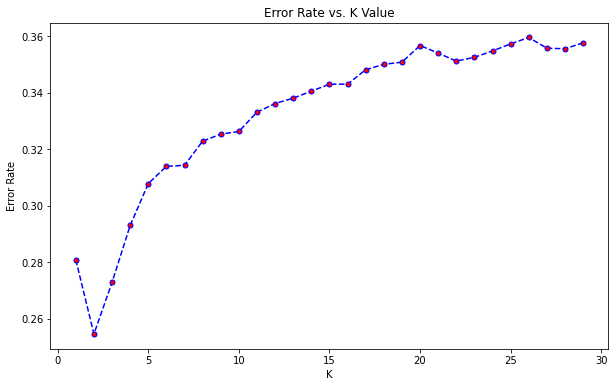

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train,y_train.values.ravel())
knn.score(X_test,y_test)

0.35119726339794755

### Hence for k=2 we are getting maximum test score 

## Creating & Training Logistic Regression Model

In [46]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [47]:
logmodel.fit(X_train,y_train.values.ravel())
logmodel.score(X_test,y_test.values.ravel())

0.3804637020144432

## Creating & Training Decision Tree Model

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()


In [49]:
dtree.fit(X_train,y_train.values.ravel())
dtree.score(X_test,y_test.values.ravel())

0.40687951349296847

## Creating & Training Random Forest Model

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=200)

In [51]:
rfc.score(X_test,y_test)

0.4505891296085139

In [115]:
pwd

'/home/aditya/Desktop/companies assesement/datascienceroleatcars24'

In [119]:
import _pickle as cPickle
with open('/home/aditya/Desktop/companies assesement/datascienceroleatcars24/save_model', 'wb') as f:
    cPickle.dump(rfc, f)


## Conclusion: Random Forest performed the best

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
pred = rfc.predict(X_test)

print(classification_report(y_test,pred, zero_division=1))


              precision    recall  f1-score   support

         1.0       1.00      0.00      0.00         1
         2.0       0.94      0.85      0.89       288
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        30
         5.0       0.06      0.04      0.05        76
         6.0       0.34      0.33      0.33       895
         7.0       0.33      0.31      0.32      1190
         8.0       0.51      0.58      0.54      2002
         9.0       0.27      0.23      0.25       439
        10.0       0.66      0.59      0.62       339

    accuracy                           0.45      5262
   macro avg       0.41      0.29      0.30      5262
weighted avg       0.44      0.45      0.45      5262



In [59]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[   0    0    0    0    0    0    1    0    0    0]
 [   0  245    0    0    0   13   11   18    1    0]
 [   0    0    0    0    0    0    2    0    0    0]
 [   0    1    0    0    1   19    8    0    0    1]
 [   0    1    0    2    3   30   22   17    0    1]
 [   0    4    1    3   16  292  282  286   11    0]
 [   0    1    0    9   23  255  374  488   36    4]
 [   0    6    0    2    9  234  403 1155  149   44]
 [   0    2    0    0    1   17   37  226  103   53]
 [   0    1    0    0    0    1    3   56   79  199]]


<AxesSubplot:>

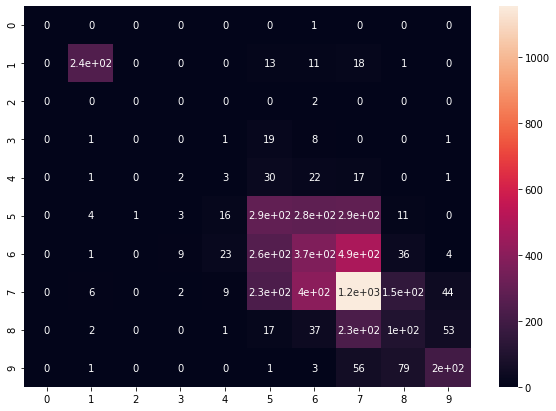

In [60]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

### Outlier detection using KNN

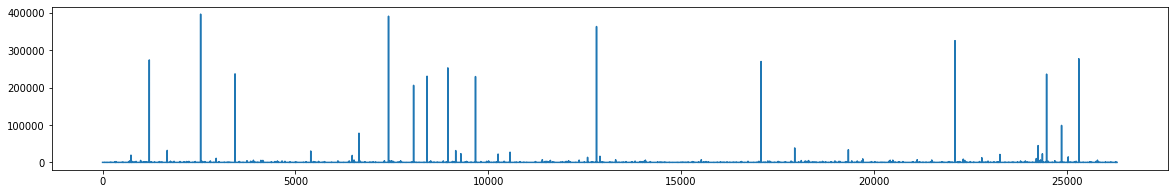

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X,y.values.ravel())
# distances and indexes of k-neaighbors from model outputs
distances, indexes = knn.kneighbors(X)
# plot mean of k-distances of each observation
plt.plot(distances.mean(axis =1))

In [106]:
# visually determine cutoff values > 20000
outlier_index = np.where(distances.mean(axis = 1) > 2000)
outlier_index

(array([  346,   677,   711,   737,   751,   759,   770,   869,   987,
         1212,  1478,  1677,  1761,  1854,  2009,  2180,  2238,  2406,
         2543,  2562,  2578,  2641,  2659,  2795,  2946,  3014,  3435,
         3546,  3745,  3842,  3912,  4105,  4156,  4472,  4534,  4654,
         4729,  5398,  5471,  5601,  5755,  6103,  6395,  6474,  6507,
         6520,  6534,  6649,  6664,  7308,  7415,  7427,  7452,  7492,
         7530,  7729,  8065,  8414,  8497,  8510,  8835,  8953,  9072,
         9079,  9143,  9157,  9290,  9439,  9670,  9806,  9961, 10011,
        10256, 10412, 10566, 10828, 11226, 11403, 11470, 11479, 11483,
        11521, 11604, 11612, 11924, 12018, 12020, 12084, 12357, 12576,
        12808, 12897, 13304, 13575, 13808, 13942, 13993, 14048, 14076,
        14204, 15295, 15525, 15647, 16567, 16736, 17010, 17059, 17075,
        17248, 17284, 17303, 17518, 17848, 17861, 17947, 18117, 18220,
        18267, 18307, 18669, 18990, 19090, 19118, 19272, 19338, 19426,
      

In [107]:
len(outlier_index[0])

167

In [110]:
# filter outlier values
result = pd.concat([X, y], axis=1)
outlier_values = result.iloc[outlier_index]
outlier_values

,odometer_reading,used_time,engineTransmission_engineOil_No,engineTransmission_engineOil_Yes,engineTransmission_exhaustSmoke_value_No,engineTransmission_exhaustSmoke_value_Yes,engineTransmission_engineMounting_value_No,engineTransmission_engineMounting_value_Yes,engineTransmission_battery_value_No,engineTransmission_battery_value_Yes,...,engineTransmission_engineBlowByBackCompression_cc_value_0_Back Compression Exist,engineTransmission_engineBlowByBackCompression_cc_value_0_NO Blow-by,engineTransmission_engineBlowByBackCompression_cc_value_0_Oil spillage on Idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. Blow By on idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. blow by & oil spillage on idle,engineTransmission_clutch_value_No,engineTransmission_clutch_value_Yes,engineTransmission_engineSound_value_No,engineTransmission_engineSound_value_Yes,rating_engineTransmission
346,238299,6,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,6
677,246066,14,1,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,6
711,282662,10,0,1,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,8
737,329645,14,0,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,2
751,246408,6,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25039,319113,14,1,0,1,0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,7
25243,252318,8,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,6
25313,840202,10,1,0,1,0,1,0,0,1,...,1,0,0,0,0,1,0,1,0,6
25760,256713,7,1,0,1,0,1,0,1,0,...,0,0,0,0,1,1,0,1,0,7


In [114]:
outlier_values.describe(include="all")

,odometer_reading,used_time,engineTransmission_engineOil_No,engineTransmission_engineOil_Yes,engineTransmission_exhaustSmoke_value_No,engineTransmission_exhaustSmoke_value_Yes,engineTransmission_engineMounting_value_No,engineTransmission_engineMounting_value_Yes,engineTransmission_battery_value_No,engineTransmission_battery_value_Yes,...,engineTransmission_engineBlowByBackCompression_cc_value_0_Back Compression Exist,engineTransmission_engineBlowByBackCompression_cc_value_0_NO Blow-by,engineTransmission_engineBlowByBackCompression_cc_value_0_Oil spillage on Idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. Blow By on idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. blow by & oil spillage on idle,engineTransmission_clutch_value_No,engineTransmission_clutch_value_Yes,engineTransmission_engineSound_value_No,engineTransmission_engineSound_value_Yes,rating_engineTransmission
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,...,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,316179.089820,10.556886,0.670659,0.329341,0.329341,0.670659,0.383234,0.616766,0.221557,0.778443,...,0.077844,0.820359,0.005988,0.077844,0.017964,0.491018,0.508982,0.712575,0.287425,5.610778
std,154587.380215,3.180522,0.471388,0.471388,0.471388,0.471388,0.487637,0.487637,0.416543,0.416543,...,0.268732,0.385042,0.077382,0.268732,0.133220,0.501423,0.501423,0.453923,0.453923,2.330650
min,225705.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,247815.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,267868.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,6.000000
75%,299624.500000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.000000
max,999999.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000


In [113]:
X.describe()

,odometer_reading,used_time,engineTransmission_engineOil_No,engineTransmission_engineOil_Yes,engineTransmission_exhaustSmoke_value_No,engineTransmission_exhaustSmoke_value_Yes,engineTransmission_engineMounting_value_No,engineTransmission_engineMounting_value_Yes,engineTransmission_battery_value_No,engineTransmission_battery_value_Yes,...,engineTransmission_gearShifting_value_Yes,engineTransmission_engineBlowByBackCompression_cc_value_0_Back Compression Exist,engineTransmission_engineBlowByBackCompression_cc_value_0_NO Blow-by,engineTransmission_engineBlowByBackCompression_cc_value_0_Oil spillage on Idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. Blow By on idle,engineTransmission_engineBlowByBackCompression_cc_value_0_Perm. blow by & oil spillage on idle,engineTransmission_clutch_value_No,engineTransmission_clutch_value_Yes,engineTransmission_engineSound_value_No,engineTransmission_engineSound_value_Yes
count,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,...,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000
mean,76460.143764,8.143422,0.705402,0.294598,0.210780,0.789220,0.353024,0.646976,0.130688,0.869312,...,0.868324,0.058768,0.826282,0.020489,0.077660,0.016802,0.447181,0.552819,0.721861,0.278139
std,46762.524489,3.766234,0.455871,0.455871,0.407871,0.407871,0.477919,0.477919,0.337065,0.337065,...,0.338145,0.235194,0.378874,0.141668,0.267641,0.128530,0.497212,0.497212,0.448091,0.448091
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46396.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72013.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,98289.500000,11.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,999999.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
!pip3 freeze > requirements.txt 